In [7]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dolphins_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math
import copy
%store -r random_numbers_matrix

In [9]:
alpha = 2

In [23]:
n = 10 # Number of iterations
m = 20 # Length of dim_array
dim_array = [i+1 for i in range(m)]
Accuracy_dim = [0]*len(dim_array)
MLL = np.zeros(m+1) # Define the MLL
l = 0 

for dim in dim_array:
    # Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
    mu = np.zeros(dim) 
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    num_samples = 62 

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    True_posetiv = np.zeros(len(random_numbers_matrix))
    True_negativ = np.zeros(len(random_numbers_matrix))
    False_posetiv = np.zeros(len(random_numbers_matrix))
    False_negativ = np.zeros(len(random_numbers_matrix))

    Accuracy = np.zeros(len(random_numbers_matrix))
    
    for s in range(len(random_numbers_matrix)):
        Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

        prev_grad = 200
        grad = 0
        n = 100000
        points_copy = copy.deepcopy(points)
        grad_sum = np.zeros(n) # Define the gradient sum
        k = 0

        while abs(prev_grad - grad) > 0.001: # stopping criteria
            prev_grad = grad
            for i in range(1,num_samples+1): # Run over number of num_samples
                grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
                grad_sum[k] += np.sum((grad_now)**2)
                points_copy[i] += LR(k)*grad_now # Use Gradient_function and take step=0.1*grad
            grad = grad_sum[k]
            k += 1

        connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
        point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
        point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
        points_a_np = np.array(point_a)
        points_b_np = np.array(point_b)

        distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
        sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

        True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
        False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
        True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
        False_negativ[s] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))
    
        Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))

    Accuracy_dim[l] = np.mean(Accuracy)

    l += 1

Text(0.5, 0, 'Dimension')

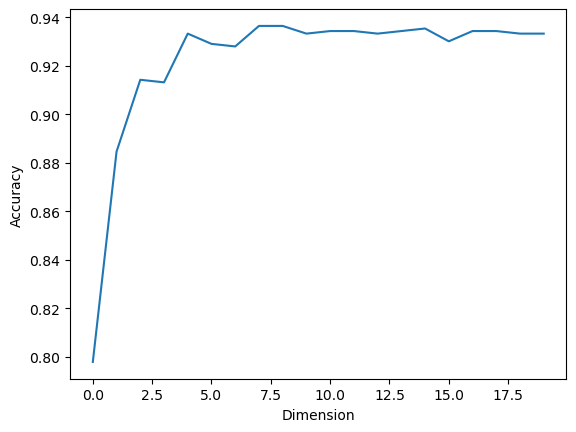

In [24]:
# Define x-axis values
plt.plot(Accuracy_dim)
plt.ylabel('Accuracy')
plt.xlabel('Dimension')